11490434/11490434 [==============================] - 0s 0us/step
Train Set shape: (60000, 28, 28)
Train Labels shape: (60000,)
Test Set shape: (10000, 28, 28)
Test Labels shape: (10000,)


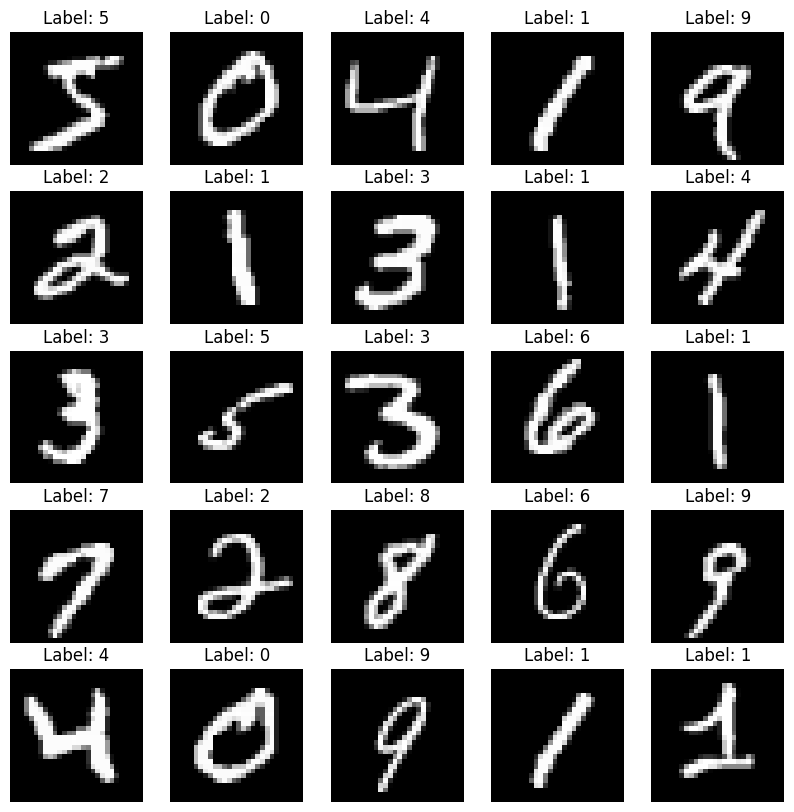

In [1]:
# CompExplained YouTube Channel
# Author: Rambod Azimi

import tensorflow as tf

import matplotlib.pyplot as plt

dataset = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

print(f"Train Set shape: {train_images.shape}")
print(f"Train Labels shape: {train_labels.shape}")
print(f"Test Set shape: {test_images.shape}")
print(f"Test Labels shape: {test_labels.shape}")


plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(f"Label: {train_labels[i]}")
  plt.axis("off")
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

model = RandomForestClassifier(n_estimators=100)

train_images_flat = np.reshape(train_images, (train_images.shape[0], -1))
test_images_flat = np.reshape(test_images, (test_images.shape[0], -1))

model.fit(train_images_flat, train_labels)

RandomForestClassifier()

In [11]:
y_pred = model.predict(test_images_flat)

accuracy = accuracy_score(test_labels, y_pred)

print(accuracy)

0.9685


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

cnn.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.1775 - accuracy: 0.9468
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0497 - accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0353 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0274 - accuracy: 0.9915
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0229 - accuracy: 0.9929


In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [20]:
y_pred_cnn = cnn.predict(test_images)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

print(classification_report(test_labels, y_pred_cnn_labels))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

